# Adult Income Dataset Analysis

## Introduction

In this notebook we will analyze a the Adult Income Dataset which is created from a 1994 US Census database. <br>
The task at hand is to predict using various classification techniques to determine if the income for an adult will be greater than or less than $50000 based on various socio-economic features such as marital status, work-class, education, occupation, and so on. <br>

### Dataset Overview

- **age**: the age of an individual
  - Integer greater than 0
- **workclass**: a general term to represent the employment status of an individual
  - Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
- **fnlwgt**: final weight. In other words, this is the number of people the census believes the entry represents.
  - Integer greater than 0
- **education**: the highest level of education achieved by an individual.
  - Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
- **education-num**: the highest level of education achieved in numerical form.
  - Integer greater than 0
- **marital-status**: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
  - Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- **occupation**: the general type of occupation of an individual
  - Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- **relationship**: represents what this individual is relative to others. For example, an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all.
  - Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
- **race**: Descriptions of an individual’s race
  - Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
- **sex**: the biological sex of the individual
  - Values: Male, Female
- **capital-gain**: capital gains for an individual
  - Integer greater than or equal to 0
- **capital-loss**: capital loss for an individual
  - Integer greater than or equal to 0
- **hours-per-week**: the hours an individual has reported to work per week
  - Continuous
- **native-country**: country of origin for an individual
  - Values: United States, Cambodia, England, Puerto Rico, Canada, Germany, Outlying US (Guam USVI etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad & Tobago, Peru, Hong, Holand-Netherlands
- **income**: whether or not an individual makes more than $50,000 annually.
  - Values: <=50k, >50k

## Data Exploration and Visualization

Fit the data into a pandas dataframe we will then see the various characteristics that the dataset provides, this includes checking for missing values, exploring the statistical summaries of the features, and visualizing some of the key relationships.

In [1]:
import warnings 
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

train_data = pd.read_csv('adult.data', names=column_names)
# Skipping the first row as it doesn't carry any information
test_data = pd.read_csv('adult.test', names=column_names, skiprows=1)

train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


From above we can see that there are some rows which contain the value '?' with some trailing whitespace, we would need to deal with these values later in the notebook <br>

From what we've learned in lecture and also from google developer website the optimal ratio for splitting training and test data is 75/25 respectively in order to yield maximal precision. Since, the distribution of training and test data in this scenario is only approximately 67/33 we would not get efficient results. Therefore, even though we have been given the training set and test set in separate files let us join them and split them according to our ratio we choose to. <br>

Let us first join the two dataframes and replace the '?' values with np.nan

In [3]:
import numpy as np

# Join dataframes
df = pd.concat([train_data, test_data])
# Reset the index
df.reset_index
# Remove ? using lambda function
df = df.applymap(lambda x: np.nan if '?' in str(x) else x)
# Check for nan values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


From above we can conclude that there are some nan values present in the workclass, occupation and native_country columns. Since they are all categorical variables we can replace them with the mode of the values for that respective column or we can remove the rows with nan values. 

Before we proceed we need to check one feature, what if the workclass has a value but the occupation is nan or vice versa. If both of them have nan values then we can consider replacing it with the mode, otherwise we might be feeding in data that doesn't make sense. Therefore, we must first remove the rows having such characteristics.

Now, it wouldn't make sense to add an occupation to somebody that has never work and since there are only a few rows having such characteristic, it is wise to remove these rows

Once these rows have been deleted we can now replace the remaining nan values with the mode of the respective feature and then remove the '.' present in the income column


In [4]:
cols = ['workclass', 'occupation', 'native_country']

# Removing rows where the occupation is empty 
df = df[~((df['workclass'].notna() & df['occupation'].isna()) | (df['workclass'].isna() & df['occupation'].notna()))]

# replacing the nan values with the mode
for col in cols:
    df[col].replace(np.nan, df[col].mode()[0], inplace=True)

# Removing the '.' that is present in some of the entries in the income column
df['income'] = df['income'].str.replace(r'\.', '', regex=True)
     
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Now that the dataset has been rid of impurities let us now perform some data analysis to find correlations between various features.

Since our target is income let us see how the data is distributed for the features and also the target (income).

From the table above we can notice that the columns education and education_num are representing the same values, education shows the education as a string and education_num is a categorical representation of the education column. Therefore, we would need to deal with this issue later in the notebook.

Let us observe the distribution of **some** of the categorical and continuous features within the dataset using either histograms or box plot and use box plots to find potential outliers.

#### Age

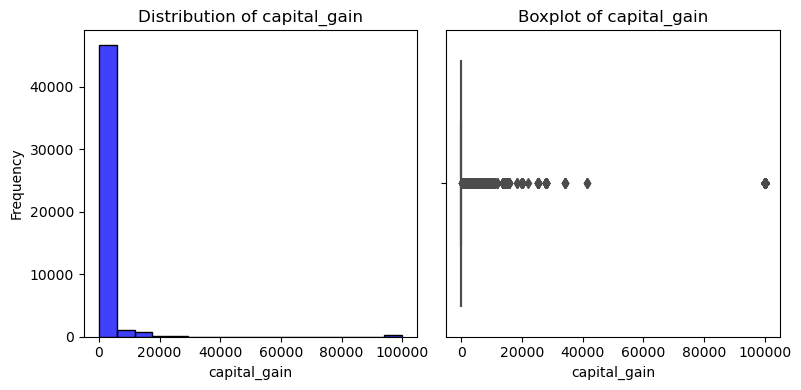

In [5]:
# Import required graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
# Histogram
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], color='blue', kde=False)
plt.title('Distribution of capital_gain')
plt.xlabel('capital_gain')
plt.ylabel('Frequency')
plt.tight_layout()

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x=df['capital_gain'], color='red')
plt.title('Boxplot of capital_gain')


plt.show()

- Very skewed distribution with majority having 0 capital gains
- This would suggest capital gains was not very common in 1994

#### fnlwgt (Final weight)

Text(0.5, 1.0, 'Boxplot of fnlwgt')

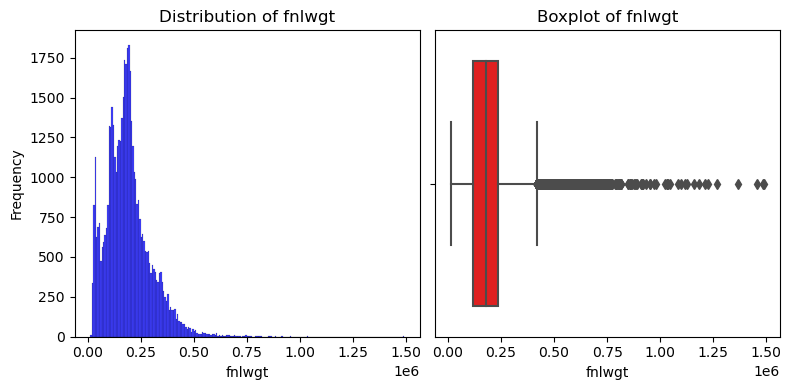

In [6]:
plt.figure(figsize=(8,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['fnlwgt'], color='blue', kde=False)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.tight_layout()

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x=df['fnlwgt'], color='red')
plt.title('Boxplot of fnlwgt')

- Heavily right skewed distribution, with outliers having significantly higher values.
- Most of the data is present between 0 and 0.4

##### Workclass

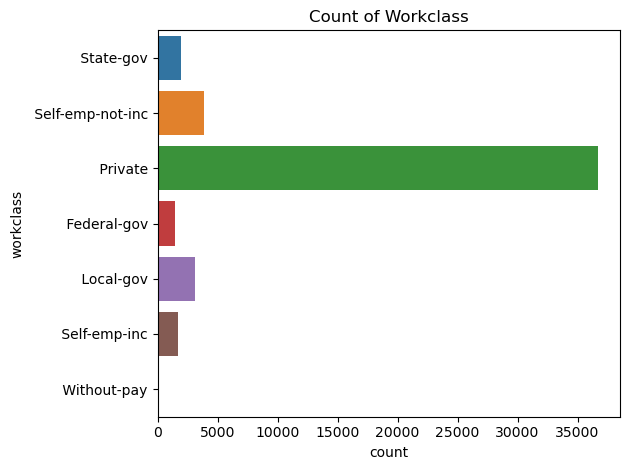

In [7]:
# Plot count plot
sns.countplot(data=df, y='workclass')
plt.title('Count of Workclass')
plt.tight_layout()
plt.show()

- Majority of the workclass is in private which indicates that the distribution is not properly balanced.

##### Occupation

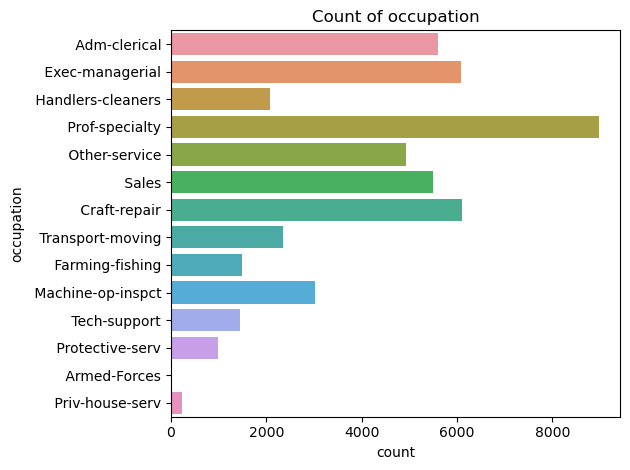

In [8]:
# Plot count plot
sns.countplot(data=df, y='occupation')
plt.title('Count of occupation')
plt.tight_layout()
plt.show()

- The distribution seem a bit diverse with "Craft-repair' and 'Prof-specialty' being the most common.
- There are also some occupation which are severely underrepresented like Armed-Forces

Finally let's look our target variable

##### Income

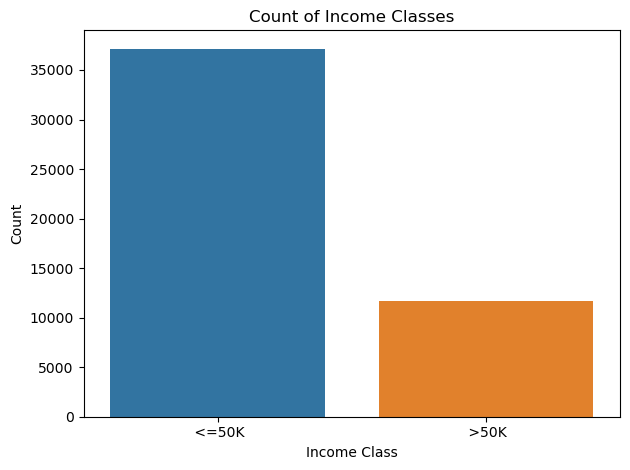

In [9]:
sns.countplot(x='income', data=df)
plt.title('Count of Income Classes')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- It is clear that there are more occurrences of the income being <=50K which would indicate that the model would be biased.

From the graphs above we can conclude that the feature distribution is heavily skewed, therefore we need to find way to handle this imbalance of data while processing the data.

Let us check the correlation matrix to find any features that might be redundant/might not have much significance on the target variable

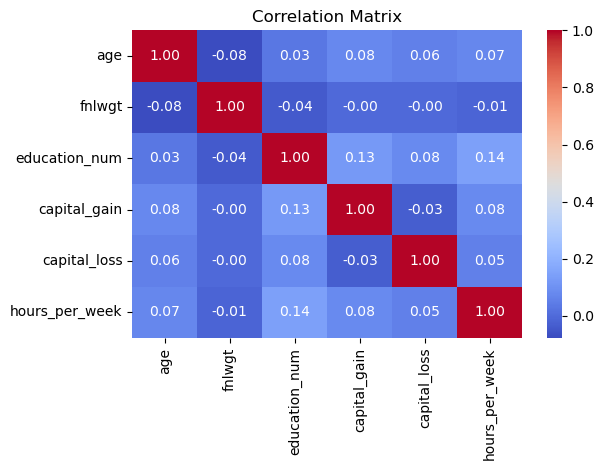

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- From the correation matrix we can see that the feature does not have any significant correlation with any of the other numerical features. Since fnlwgt has many outliers with massively higher values, we can conclude that it is wise to remove such a column in order to increase the accuracy of the column.
- Since the feature education_num is a categorical representation of the education column it is wise to remove such redundant column as we would use label encoding to categorize the education column during data preprocessing.

In [11]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Upon completion of exploratory data analysis we can conclude the following: <br>
- **Total Instances**: 48,832
- **Features**:
  - *Categorical*: workclass, marital_status, occupation, relationship, race, sex, native_country
  - *Continuous*: age, education_num, capital_gain, capital_loss, hours_per_week
- **Target Variable**:
  - Income (binary: '>50K' or '<=50K')

## Data Preprocessing and Modelling

Let us proceed with processing the data for training the model. 

Using one-hot encoding on the categorical columns except income as it creates new features for every additional value and prevents the machine learning algorithm from assuming higher values have more precedence. 

After, one hot encoding is done we will deal with the highly skewed numerical variable using a power transformer. This will make the data in the numerical columns more Gaussian-like or follow a normal distribution. By adjusting the distribution of the numerical features helps in stabilizing variance and minimize skewness.

After, encoding and transformation, the processed categorical and numerical data are concatenated back together. Now, we need to deal with the imbalances that is presented within the data by oversampling the minority. In order to do so we will make use of SMOTE (Synthetic Minority Over-sampling Technique) which will help by generating syntheic points for the minority in preventing the model from a bias for the majority side and overfitting

Now, we will proceed with scaling the data using MinMaxScalar() which would scale all the features down to 0 and 1, which would ensure that all of the features are contributing a similar amount to the model

Finally, we would split the data for training and test by using train_test_split to ensure there is no overfitting of the data. We make use or stratify in order to ensure that the train and test set have similar distributions.

In [12]:
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Selecting the categorical and numerical variables except the target variable (income)
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'income']
numerical_columns = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Use one hot encoding on the categorical columns 
encode = OneHotEncoder(drop='first', sparse_output=False) # drop='first' to avoid multicollinearity and avoid a sparse matrix so we can get the true values
# Fit and transform the categorical columns
encoded_data = encode.fit_transform(df[categorical_columns])
# Create a dataframe for the encoded column using the feature names we have
encoded_df = pd.DataFrame(encoded_data, columns=encode.get_feature_names_out(categorical_columns))

# Concatenate the data with the original data by resetting the indices so that they are properly aligned
df = pd.concat([df.drop(columns=categorical_columns).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Apply power transfer on numerical columns with skewness greater than 0.5
pt = PowerTransformer()
for i in numerical_columns:
    if np.abs(df[i].skew()>0.5):
        df[[i]] = pt.fit_transform(df[i].values.reshape(-1,1))

# Prepare the features and target
X = df.drop('income', axis=1)  # Drop the target variable from the feature set
y = df['income']

# Perform encoding on the target column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handling the imbalance in the data using SMOTE
X, y = SMOTE().fit_resample(X=X,y=y_encoded)

# Scaling the features 
xs = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(xs, columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Let us now proceed with the model building stage. First we will build a machine learning models with minimal change to the hyper parameters and verify the results. Finally, we will use RandomizedSearchCV in order to tune the hyper parameters to find the best fit. 

The model we will be using is an **eXtreme Gradient Boosted Classifier**, as they are able to handle large datasets with great speed and high accuracy. It also has the ability to handle large datasets which would in turn yield a higher accuracy for such datasets

For now the only parameters we would need to provide is random_state and also use_label_encoder for the XGB classifier as we have already finished encoding.

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models_to_train = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, random_state=42)
}

# Function to evaluate the model
def model_evaluation(X_train, y_train, X_test, y_test, model, name):
    # Fitting the model with train data
    model.fit(X_train, y_train)
    # Run the model on the test set
    predictions = model.predict(X_test)
    # Calculate model accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(name + " Accuracy:", accuracy)

# Training the models in models
for name, model in models_to_train.items():
    print('Executing ' + str(name))
    model_evaluation(X_train,  y_train, X_test, y_test, model, str(name))

Executing XGBClassifier
XGBClassifier Accuracy: 0.8901092984439778


The XGB classifier has a good accuracy. Let's see what hyperparameter tuning will do

We will choose a range of values for the following parameters which play a significant role in model performance:

#### Finding optimal hyperparmeters (XGBClassifier)

- **max_depth**: Controls the depth of tree generated, a deeper tree can model more complex relations but can lead to overfitting. That is why I have put three values (5,10,15) so we can choose the that has the least amount of overfitting.

- **learning_rate**: Used to limit the influence of each individual tree generated. A lower learning rate generally implies a better model but this would generally slow down the algorithm so we would need to find the right value that would have good speed and a better model generalization

- **min_child_weight**: The minimum sum of instance weight (hessian) needed for a child. It is generally used to control overfitting. A higher value would generally prevent the model from forming relations that are have lower occurrences within the dataset.

We choose a range of values for these hyperparameters instead of just taking the first one that comes in mind since machine learning is an exploratory process and the first value we choose might not be the best one.

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# params for XGB classifier
param_xgb = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.15, 0.05, 0.1],
    'min_child_weight': [1, 3, 4]  
}

# Initialize RandomizedSearchCV with the respective model with a cross-validation of 5 in order to prevent overfitting of data
xgb_search = RandomizedSearchCV(models_to_train['XGBClassifier'], param_distributions=param_xgb, cv=5)


# Train the model across the parameter grid for the respective model
xgb_search.fit(X_train, y_train)


# Print the best xgb model, its parameters and accuracy which was found by RandomizedSearchCV
print('XGBClassifier Results:')
print('Model: ', xgb_search.best_estimator_)
print('\nParams: ',xgb_search.best_params_)
print('Accuracy: ', xgb_search.best_score_)

XGBClassifier Results:
Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Params:  {'min_child_weight': 4, 'max_depth': 15, 'learning_rate': 0.15}
Accuracy:  0.8924385939131433


It is clear that:
- XGB classifier has an accuracy of approximately 0.89 with optimal parameters as 'shown above, which is the best output for this model.

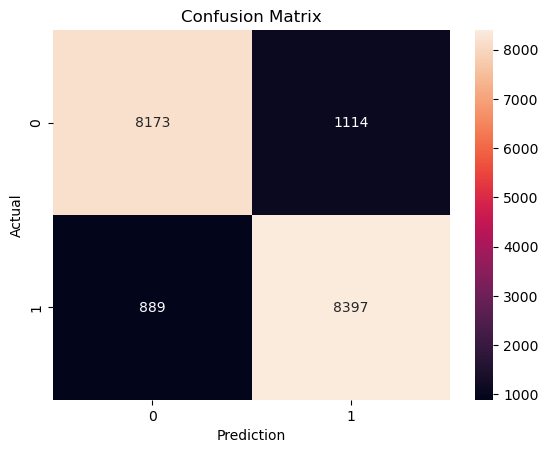

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      9287
           1       0.88      0.90      0.89      9286

    accuracy                           0.89     18573
   macro avg       0.89      0.89      0.89     18573
weighted avg       0.89      0.89      0.89     18573

Accuracy of final model:  0.8921552791686858


In [15]:
from sklearn.metrics import confusion_matrix

# Define the base learners
model = XGBClassifier(**xgb_search.best_params_, radom_state=42)

# Train the model 
model.fit(X_train, y_train)

# Predict the test set
pred = model.predict(X_test)

# Creating the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, pred))

# Print final accuracy
print('Accuracy of final model: ', accuracy_score(y_test, pred))


Based on the classification reports:

- The XGB classifier  is able to generalize new data better as recall and precision are almost the same values.
- The model does not so much signs as bias based on the the f1 score, which means we were able to solve the problem of the imbalanced dataset.
- This is means by using preprocessing techniques like SMOTE we were able to remove a large portion the imbalances present within the dataset.

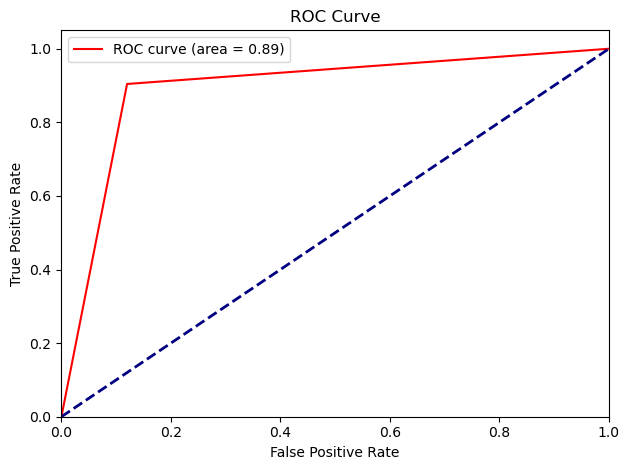

In [16]:
from sklearn.metrics import roc_curve, auc

# Find the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)

# Plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate, color='red', label='ROC curve (area = %0.2f)' % auc(false_positive_rate, true_positive_rate))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

Observations:

- The model is able to stay above the diagonal line, which means it is able to properly differentiate distinguish the data between the two classes (better that a random guess).
- Since the curve stays relatively closer to the top-left corner, means it has a good true positive rate.

Finally, let us check for one thing, if the data is overfit. 

In [17]:
# Get test predictions
test_pred = model.predict(X_test)
# Get training prediction
train_pred = model.predict(X_train)
# Find accuracy of training data
train_accuracy = accuracy_score(y_train, train_pred)
# Find accuracy of testing data
test_accuracy = accuracy_score(y_test, test_pred)
# Print them
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.92
Test Accuracy: 0.89


- With a training accuracy of 0.92 and testing accuracy of 0.89 we can conclude that the model is performing well.
- With the difference of accuracies only being 3 percentage points, it is hard to conclude that there is evidence of overfitting.
- Therefore, we can conclude that this machine learning model is able to accurately predict if a person's income range is above or below 50K from the census data.

## Citations

Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

Training and test sets: Splitting data  |  machine learning  |  google for developers. (2022, July 18). Google. Google. https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data. Accessed 25 April 2024 

Dhasade, G. (2020, September 4). Ways to handle categorical column missing data & its implementations. Medium. Analytics Vidhya. https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893. Accessed 25 April 2024 

Sklearn.preprocessing.onehotencoder. (n.d.). scikit. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Accessed 25 April 2024 

Brownlee, J. (2021, March 16). Smote for imbalanced classification with python. MachineLearningMastery.com. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. Accessed 25 April 2024 

Jain, A. (2024, January 7). Mastering xgboost parameters tuning: A complete guide with python codes. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/#:~:text=What%20parameters%20should%20you%20use,minimum%20child%20weight%20(min_child_weight). Accessed 25 April 2024 

Classification: Roc curve and AUC  |  machine learning  |  google for developers. (n.d.). Google. Google. https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=An%20ROC%20curve%20(receiver%20operating,True%20Positive%20Rate. Accessed 26 April 2024 